<a href="https://colab.research.google.com/github/varshithavijayakrishna/gui_parkinson_model/blob/main/symptoms_test_March10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import ipywidgets as widgets

In [29]:
from google.colab import files
uploaded = files.upload()


Saving parkinsons_disease_data.csv to parkinsons_disease_data.csv


In [30]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("parkinsons_disease_data.csv")  # Replace with your uploaded file name

# Display the first few rows
df.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [31]:
df.shape

(2105, 35)

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2105.0,4110.000000,607.805479,3058.000000,3584.000000,4110.000000,4636.000000,5162.000000
Age,2105.0,69.601900,11.594511,50.000000,60.000000,70.000000,80.000000,89.000000
Gender,2105.0,0.492637,0.500065,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2105.0,0.692637,1.003827,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2105.0,1.337292,0.895840,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2105.0,27.209493,7.208099,15.008333,20.782176,27.184571,33.462452,39.999887
Smoking,2105.0,0.296437,0.456795,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2105.0,10.040413,5.687014,0.002228,5.150278,10.070337,14.829565,19.988866
PhysicalActivity,2105.0,5.016674,2.890919,0.004157,2.455703,5.031550,7.512795,9.995255
DietQuality,2105.0,4.912901,2.872115,0.000011,2.478503,4.825187,7.381487,9.995864


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [34]:
# Check for missing values
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [35]:
# Check for duplicates and remove them
df.duplicated().sum()

0

In [36]:
# Columns
numerical_columns = [
    'Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS',
    'MoCA', 'FunctionalAssessment']

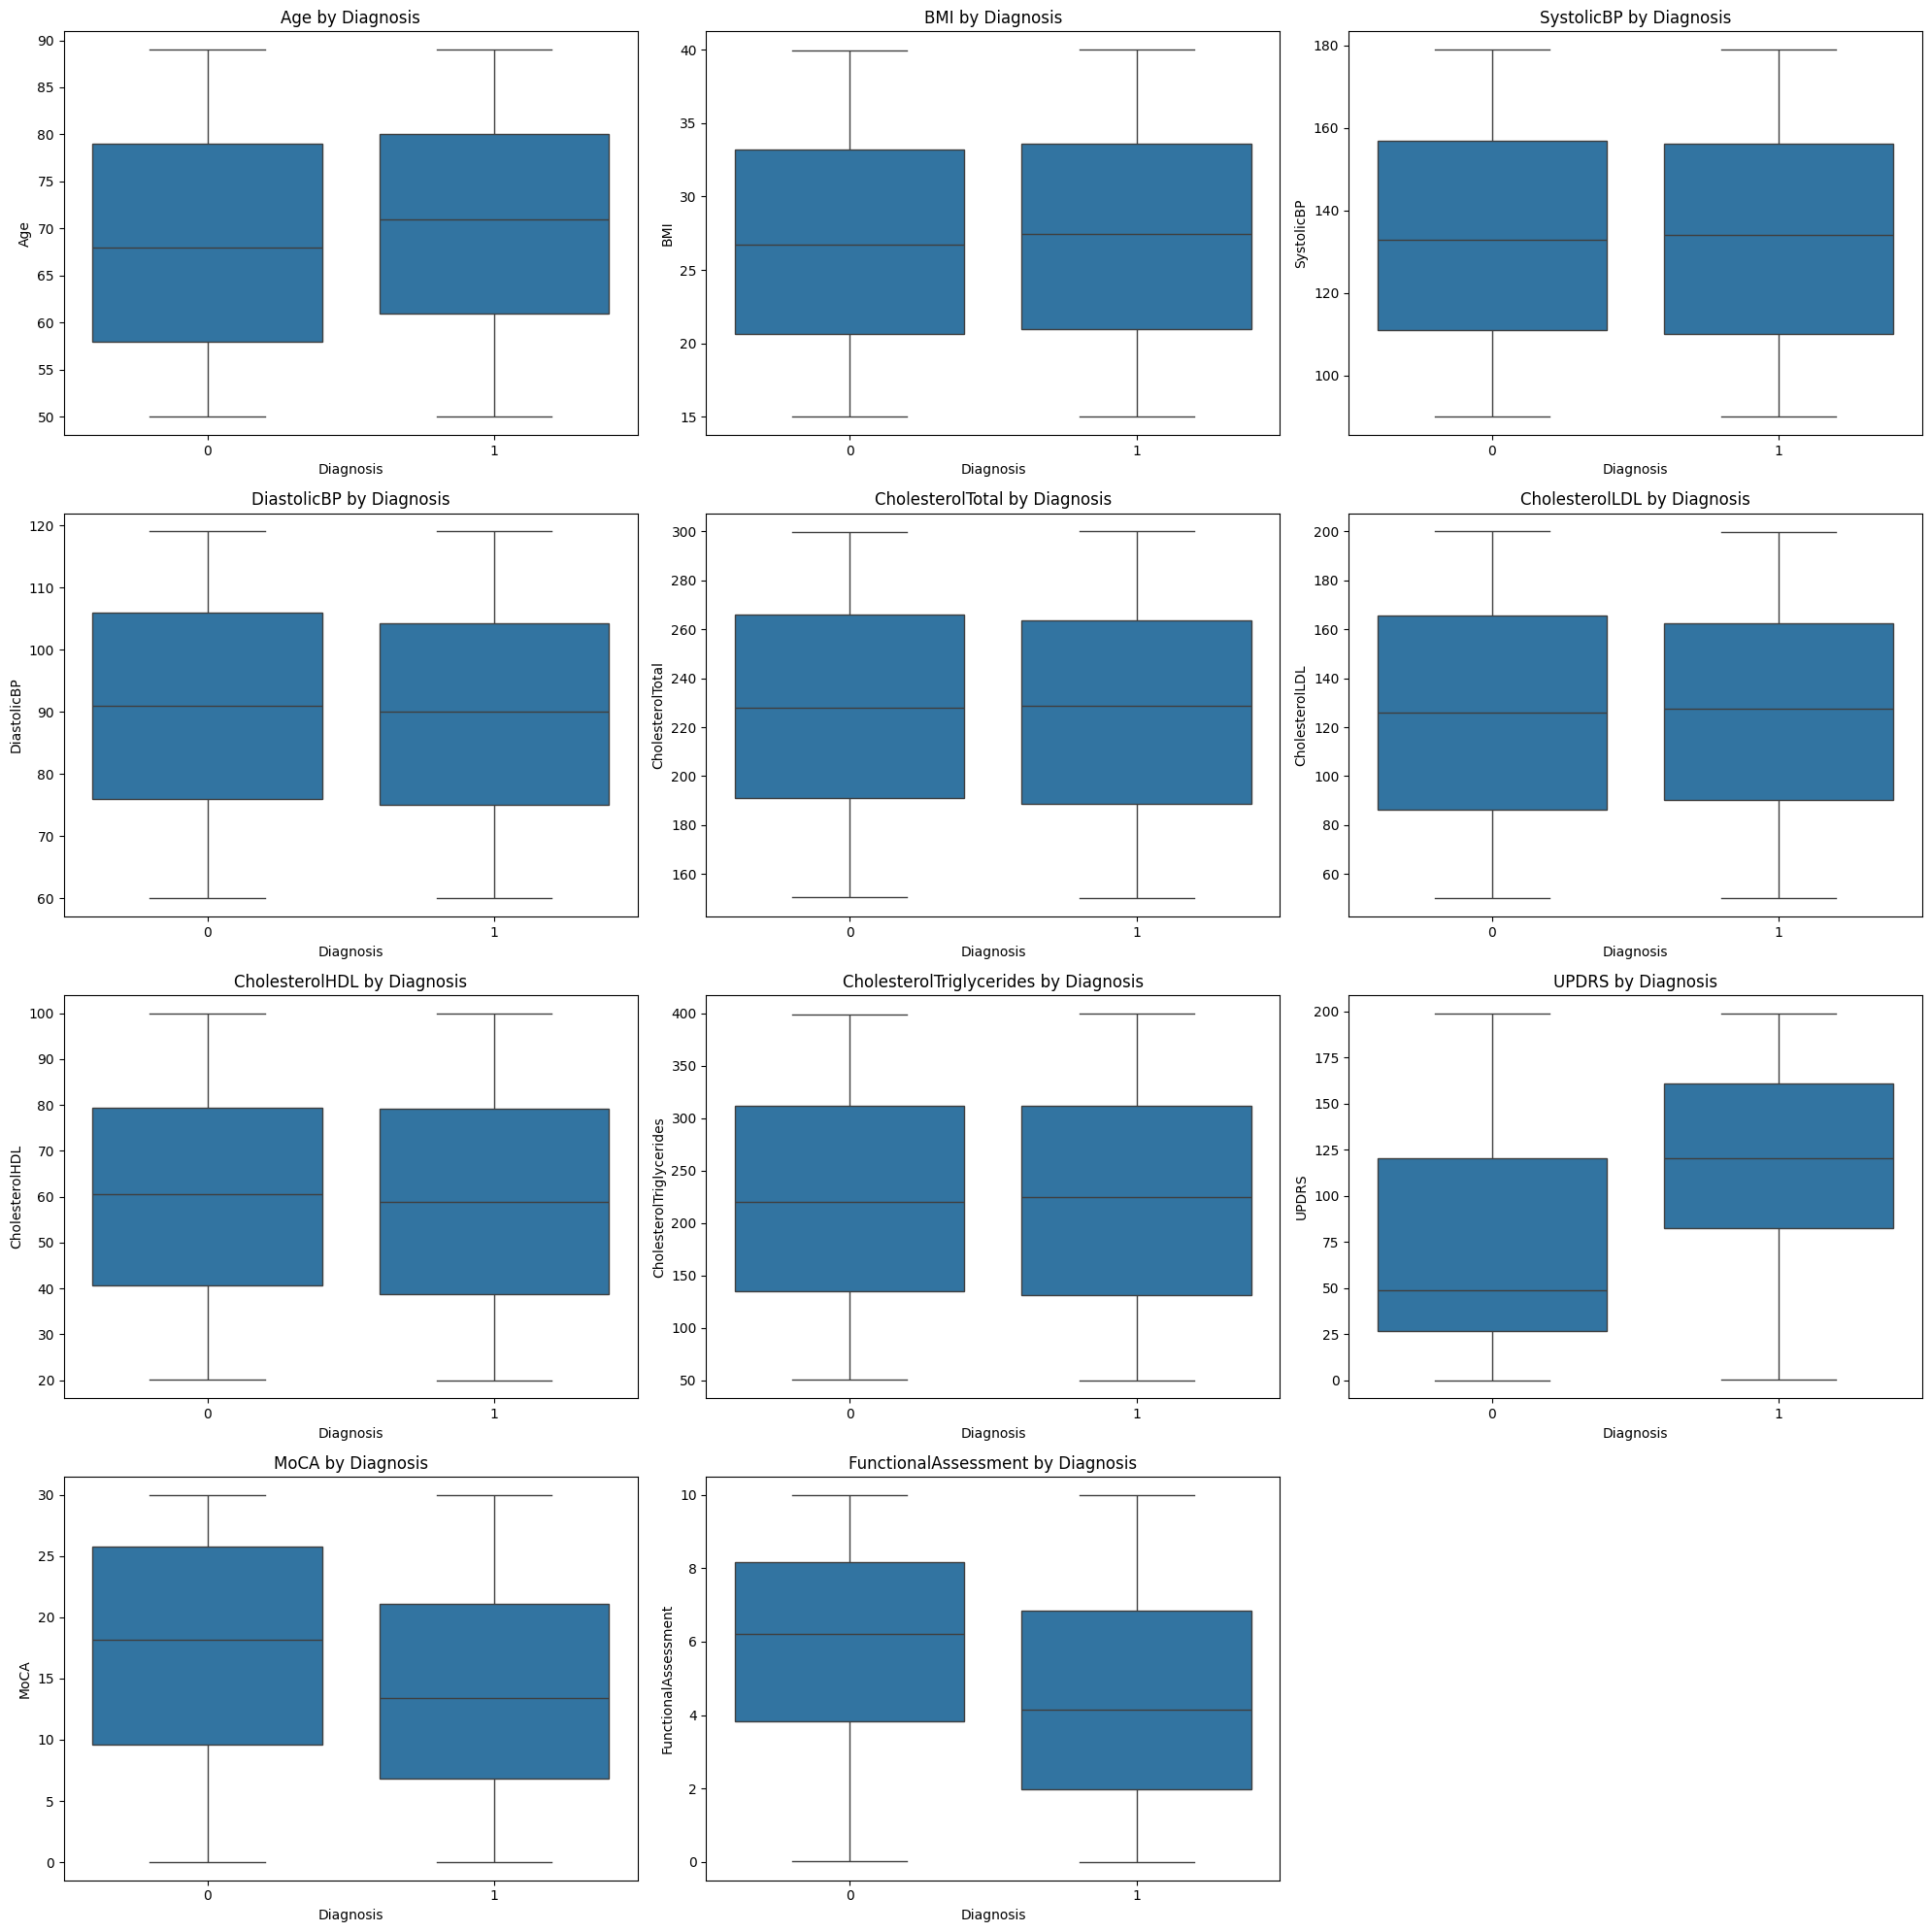

In [37]:
# Box plots for numerical features grouped by Diagnosis
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='Diagnosis', y=col, data=df)
    plt.title(f'{col} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

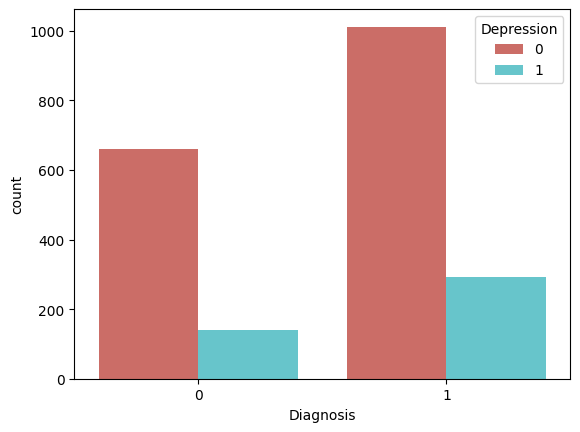

In [38]:
df = df.drop("DoctorInCharge", axis = 1)
sns.countplot(x = "Diagnosis", hue = "Depression" ,data =df, palette= "hls");

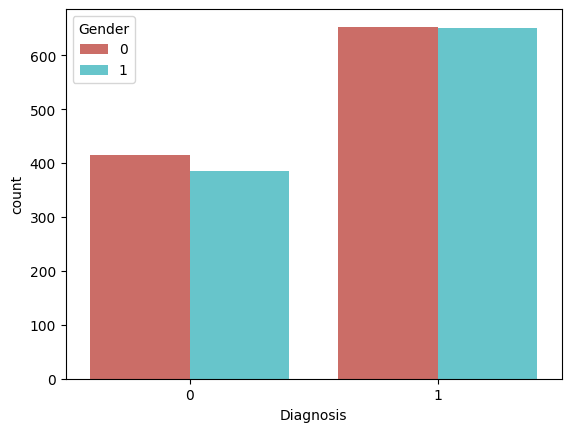

In [39]:
sns.countplot(x = "Diagnosis", hue = "Gender", data = df, palette = "hls");

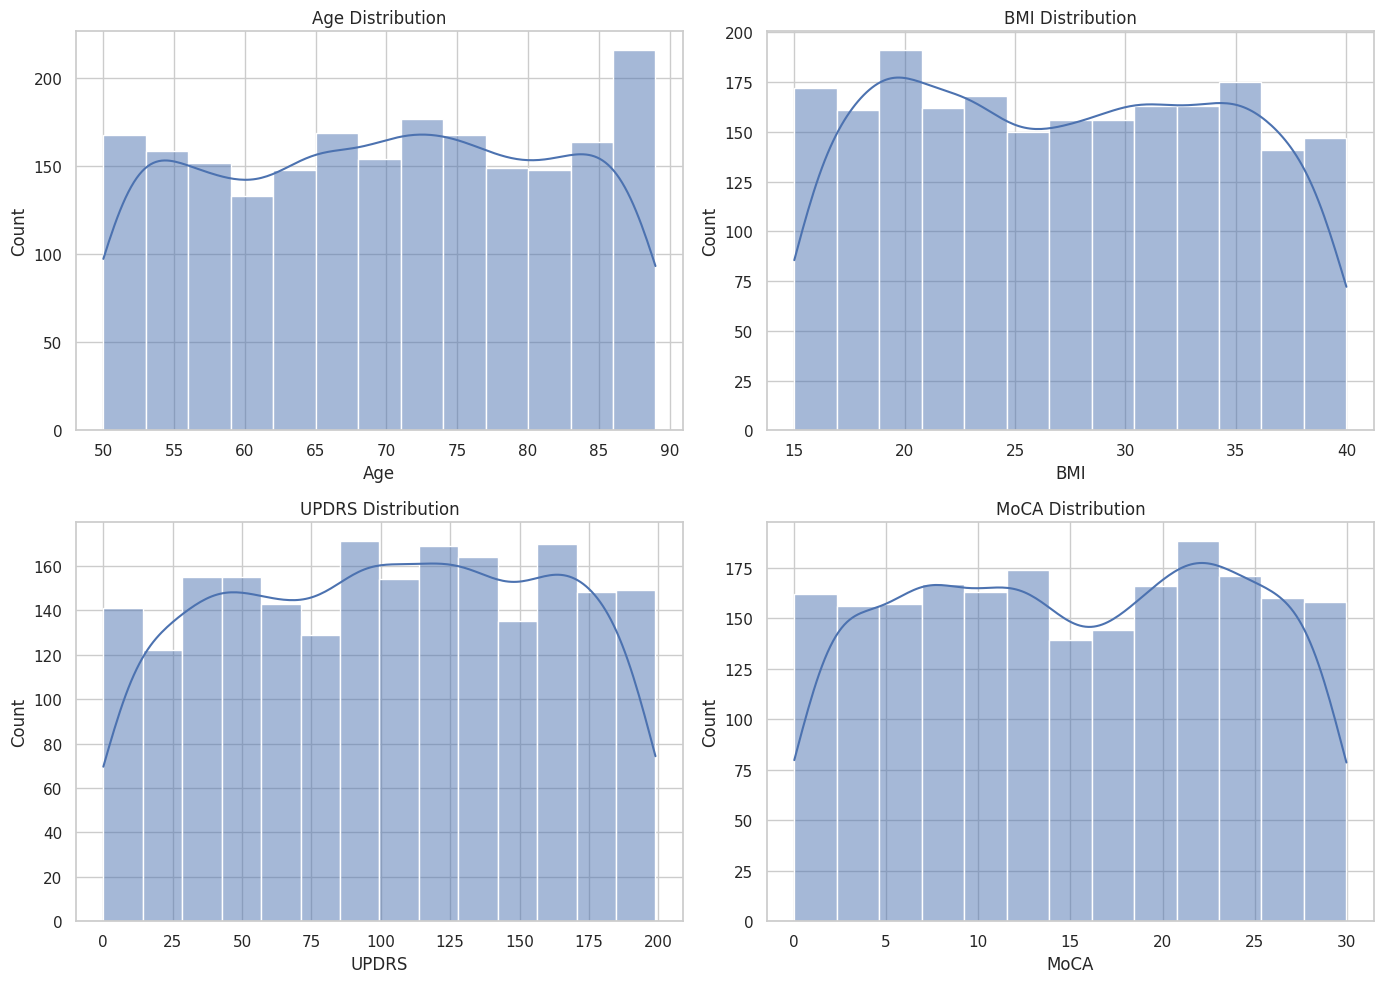

In [40]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of Age, BMI, UPDRS, and MoCA
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# BMI distribution
sns.histplot(df['BMI'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

# UPDRS distribution
sns.histplot(df['UPDRS'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('UPDRS Distribution')

# MoCA distribution
sns.histplot(df['MoCA'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('MoCA Distribution')
plt.tight_layout()
plt.show()

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns from correlation calculation
numeric_df = df.drop(columns=non_numeric_columns)


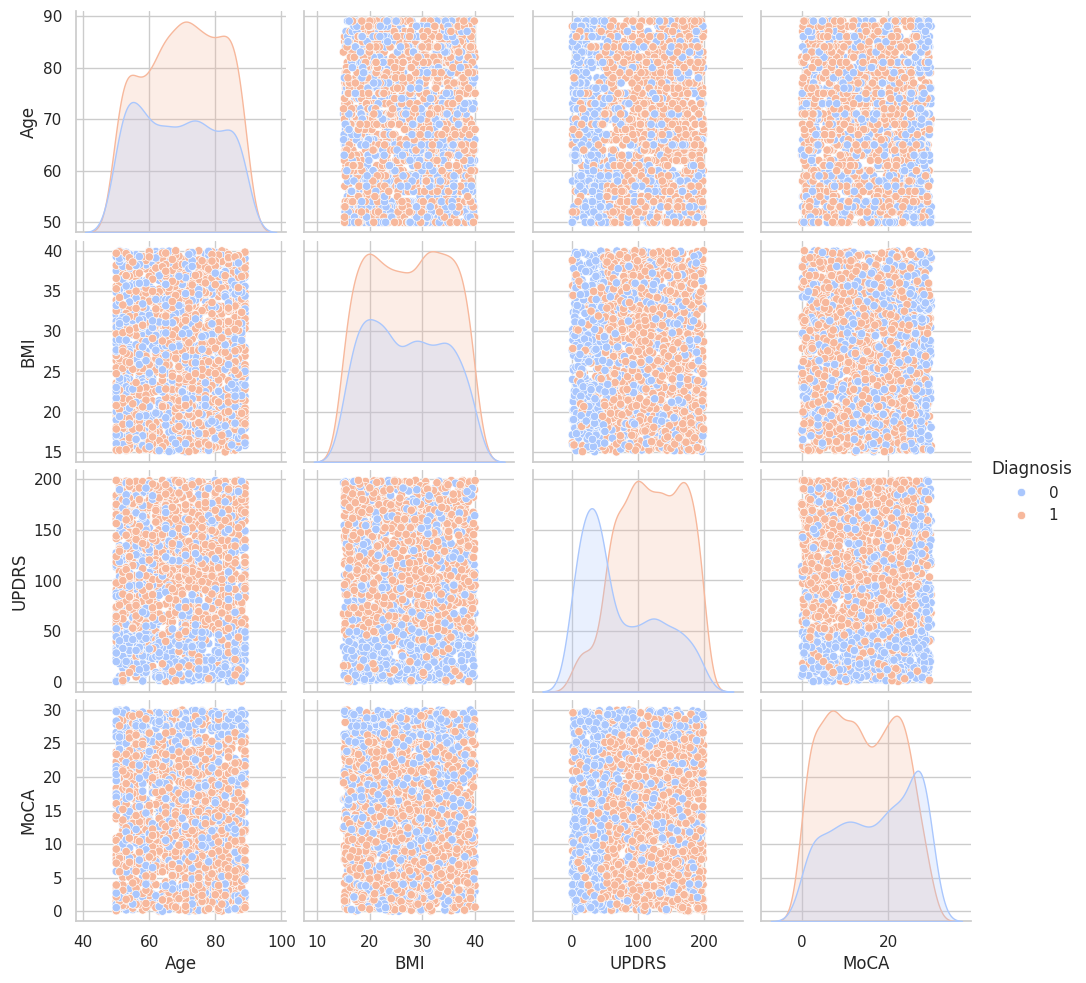

In [41]:
# Pairplot for selected features
selected_features = ['Age', 'BMI', 'UPDRS', 'MoCA', 'Diagnosis']
sns.pairplot(df[selected_features], hue='Diagnosis', palette='coolwarm')
plt.show()

In [43]:
#Define a function to plot the disctribution of features
def plot_feature(feature):
    plt.figure(figsize=(10,6))
    df[feature].hist(bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Create a dropdown widget with the dataframe's column names
dropdown = widgets.Dropdown(options=df.columns, description='Feature:')

# Use the interact function to create the widget and the plot
widgets.interact(plot_feature, feature=dropdown);

interactive(children=(Dropdown(description='Feature:', options=('PatientID', 'Age', 'Gender', 'Ethnicity', 'Ed…

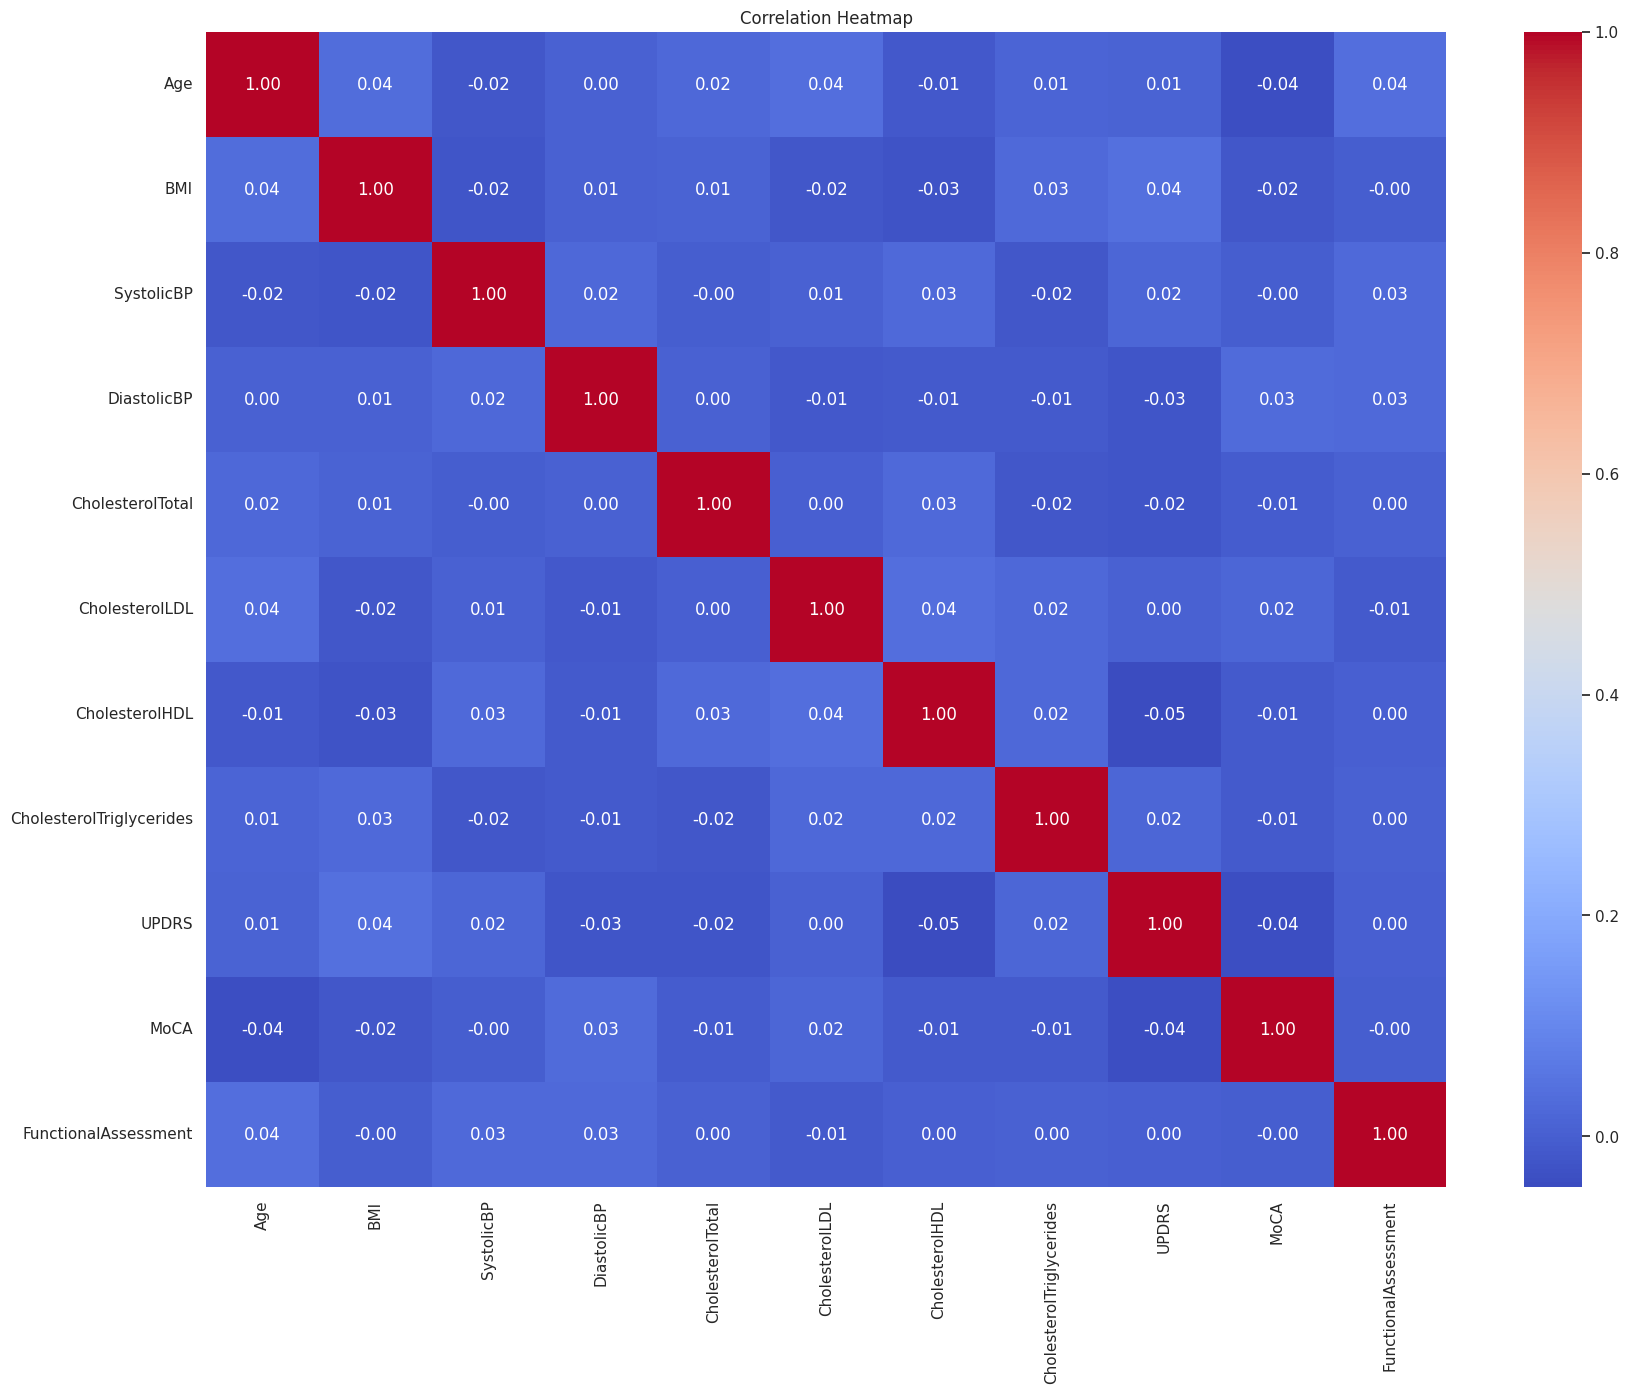

In [44]:
# Correlation Heatmap
plt.figure(figsize=(20, 15))
numeric_data = df[numerical_columns]
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')

In [46]:
symptom_columns = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation']
df_symptoms = df[symptom_columns + ['Diagnosis']]  # Include Diagnosis as the target


In [47]:
df_symptoms.isnull().sum()  # Check for missing values
# You can fill missing values with a method like forward filling or mean imputation
df_symptoms.fillna(df_symptoms.mean(), inplace=True)  # Example of mean imputation


<ipython-input-47-a34b42d0ceed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_symptoms.fillna(df_symptoms.mean(), inplace=True)  # Example of mean imputation


In [48]:
df_symptoms['Diagnosis'] = df_symptoms['Diagnosis'].apply(lambda x: 1 if x == 'Parkinson\'s' else 0)


<ipython-input-48-b431c2ea8f22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_symptoms['Diagnosis'] = df_symptoms['Diagnosis'].apply(lambda x: 1 if x == 'Parkinson\'s' else 0)


In [53]:
from sklearn.model_selection import train_test_split

X = df_symptoms.drop('Diagnosis', axis=1)  # Features (symptoms)
y = df_symptoms['Diagnosis']  # Target variable (Diagnosis)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split your data (if not already done)
X = df_symptoms.drop('Diagnosis', axis=1)  # Features (symptoms)
y = df_symptoms['Diagnosis']  # Target variable (Diagnosis)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [55]:
y_pred = model.predict(X_test)  # Make predictions


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

# Display the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       421

    accuracy                           1.00       421
   macro avg       1.00      1.00      1.00       421
weighted avg       1.00      1.00      1.00       421

[[421]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Average score: {scores.mean()}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Average score: 1.0


In [62]:

df.columns


Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')

In [63]:
# Check for missing values
missing_data = df.isnull().sum()

# Impute or drop missing values (if any)
df = df.fillna(df.mean())  # Impute with mean for numerical columns


In [64]:
# Example: Encoding categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'Ethnicity', 'EducationLevel'])


In [65]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Applying scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


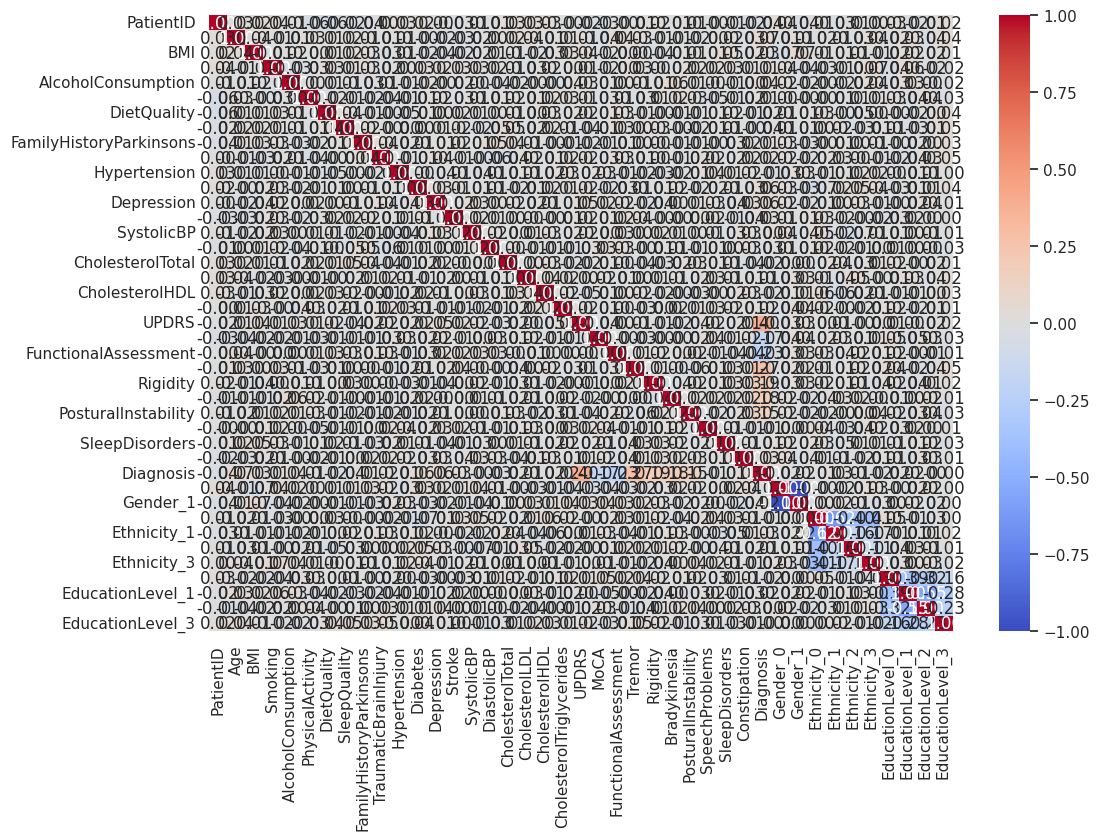

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations and plot heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [67]:
from sklearn.model_selection import train_test_split

X = df.drop('Diagnosis', axis=1)  # Features
y = df['Diagnosis']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
print(df['Diagnosis'].unique())



[-1.27591733  0.78374983]


In [72]:
# Use RandomForestRegressor for continuous target
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming your dataset is loaded in df
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']  # Continuous target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"R^2 Score: {score:.2f}")


R^2 Score: 0.70


In [73]:
import pickle

# Save the trained model to a file
with open('symptoms_model.pkl', 'wb') as f:
    pickle.dump(model, f)
